## Machine Learning Algorithms Regression Algorithms

Implementation of regression algorithms on the evolution of mental disorders and predict values up to 2050.

In [29]:
!curl https://raw.githubusercontent.com/Angelaruizalvarez/Mental-Health-ML-Algorithms/main/df_income.csv > df_income.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8457  100  8457    0     0  30471      0 --:--:-- --:--:-- --:--:-- 30420


Select a different index depending on the disorder that you want to use:


0.   Schizophrenia disorders
1.   Depressive disorders
2.   Anxiety disorders
3.   Bipolar disorders
4.   Eating disorders





In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('df_income.csv')

# List of disorders
disorders = [
    "Schizophrenia disorders",
    "Depressive disorders",
    "Anxiety disorders",
    "Bipolar disorders",
    "Eating disorders",
]

# Select disorder index with code shown above
disorder_index = 0
disorder = disorders[disorder_index]

## Linear Regression

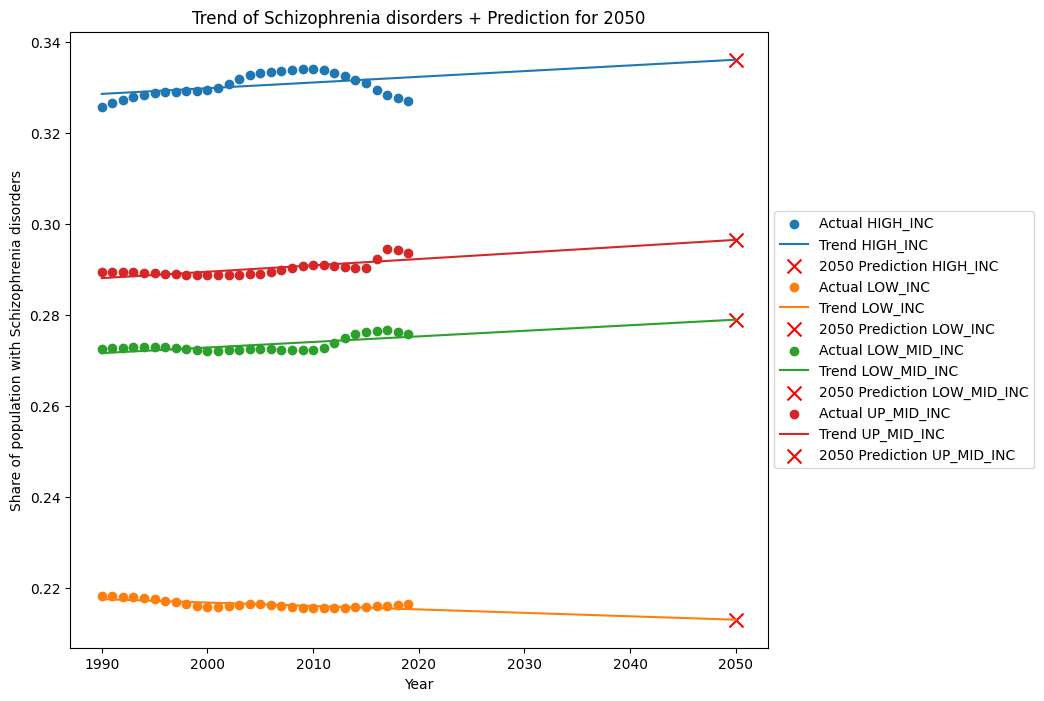

          Code      1990      2019      2050
0     HIGH_INC  0.328651  0.332285  0.336170
1      LOW_INC  0.217510  0.215317  0.212974
2  LOW_MID_INC  0.271626  0.275183  0.278985
3   UP_MID_INC  0.288119  0.292190  0.296542


In [31]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(9, 8))
# Dictionary for summary table
summary_data = []

# Iterate for plotting all the Codes
for code in df['Code'].unique():
    sub_df = df[df['Code'] == code]  # Filter by Code
    x = sub_df['Year'].values.reshape(-1, 1)  # Reshape for sklearn
    y = sub_df[disorder].values

    # Train Linear Regression model
    model = LinearRegression().fit(x, y)

    # Predict values
    years_future = np.array([1990, 2019, 2050]).reshape(-1, 1)
    predictions = model.predict(years_future)
    summary_data.append([code, predictions[0], predictions[1], predictions[2]])

    # Real actual data that we have
    ax.scatter(x, y, label=f'Actual {code}')

    # Regression line
    x_full = np.append(x, [[2050]])  # Include 2050 for plotting
    ax.plot(x_full, model.predict(x_full.reshape(-1, 1)), label=f'Trend {code}')

    # Mark our 2050 prediction
    ax.scatter(2050, predictions[2], color='red', marker='x', s=100, label=f'2050 Prediction {code}')

ax.set_xlabel("Year")
ax.set_ylabel(f"Share of population with {disorder}")
ax.set_title(f"Trend of {disorder} + Prediction for 2050")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Convert summary data to DataFrame
summary_df = pd.DataFrame(summary_data, columns=["Code", "1990", "2019", "2050"])
print(summary_df)

## Decision Tree

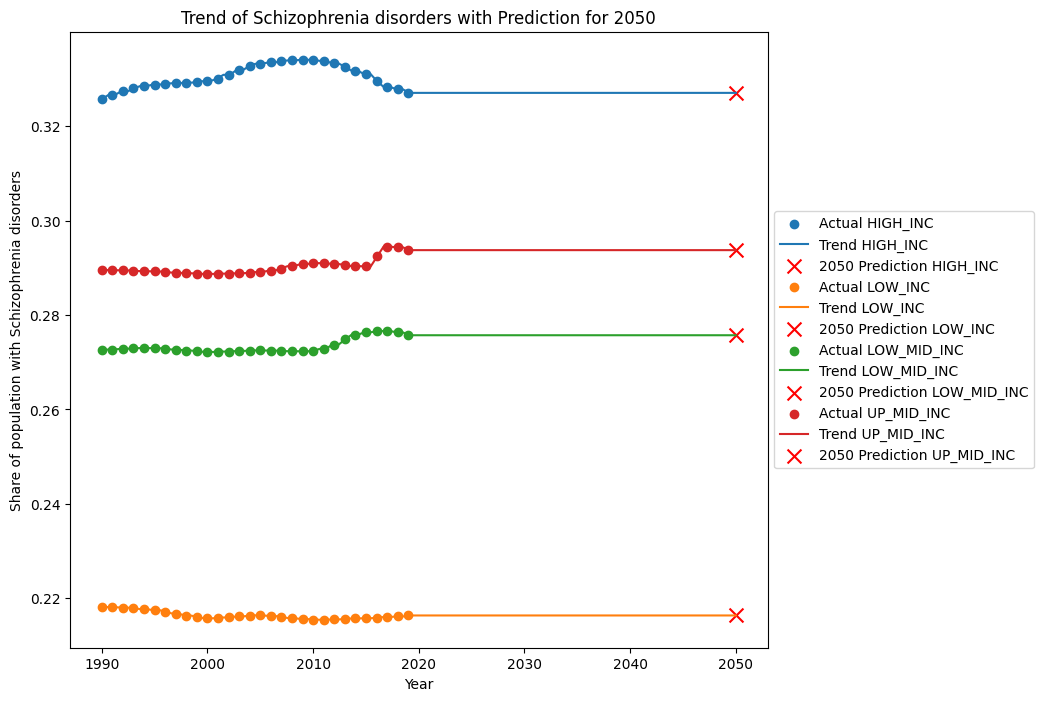

          Code      1990      2019      2050
0     HIGH_INC  0.325683  0.327047  0.327047
1      LOW_INC  0.218260  0.216379  0.216379
2  LOW_MID_INC  0.272493  0.275722  0.275722
3   UP_MID_INC  0.289578  0.293744  0.293744


In [32]:
from sklearn.tree import DecisionTreeRegressor
fig, ax = plt.subplots(figsize=(9, 8))
summary_data = []

for code in df['Code'].unique():
    sub_df = df[df['Code'] == code]  # Filter by Code
    x = sub_df['Year'].values.reshape(-1, 1)  # Reshape for sklearn
    y = sub_df[disorder].values

    # Train Decision Tree model
    model = DecisionTreeRegressor().fit(x, y)

    years_future = np.array([1990, 2019, 2050]).reshape(-1, 1)
    predictions = model.predict(years_future)

    summary_data.append([code, predictions[0], predictions[1], predictions[2]])

    ax.scatter(x, y, label=f'Actual {code}')

    # Plot decision tree prediction
    x_test = np.linspace(x.min(), 2050, 100)[:, np.newaxis]  # Extend range to 2050
    ax.plot(x_test, model.predict(x_test), label=f'Trend {code}')

    ax.scatter(2050, predictions[2], color='red', marker='x', s=100, label=f'2050 Prediction {code}')

ax.set_xlabel("Year")
ax.set_ylabel(f"Share of population with {disorder}")
ax.set_title(f"Trend of {disorder} with Prediction for 2050")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

summary_df = pd.DataFrame(summary_data, columns=["Code", "1990", "2019", "2050"])
print(summary_df)

## Random Forest


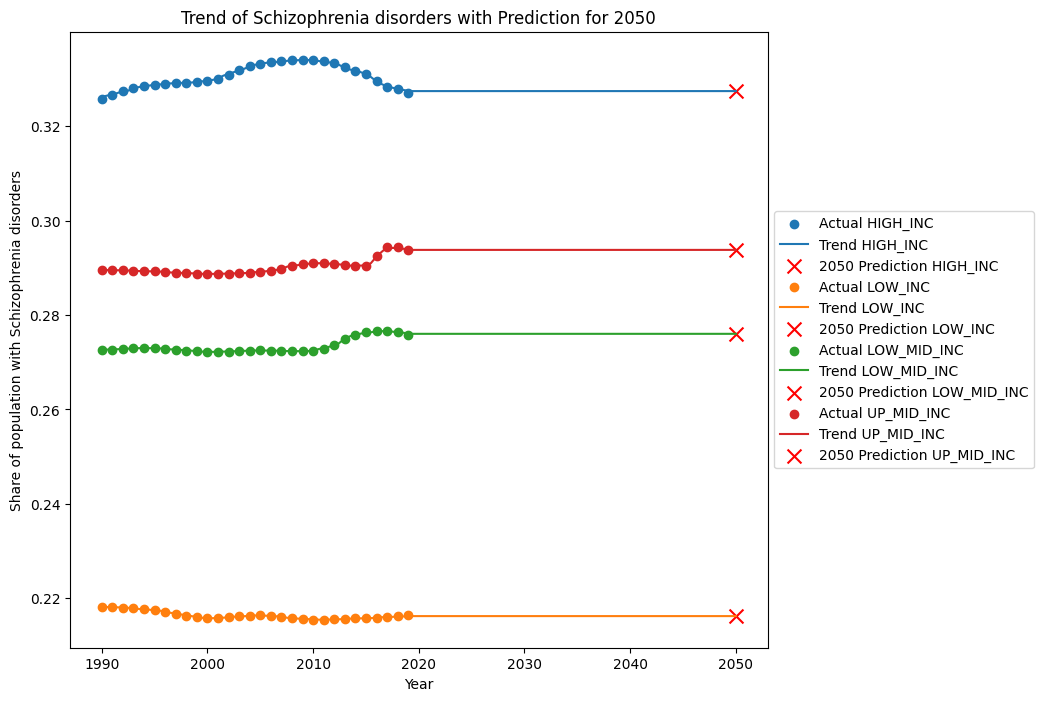

          Code      1990      2019      2050
0     HIGH_INC  0.326193  0.327425  0.327425
1      LOW_INC  0.218211  0.216243  0.216243
2  LOW_MID_INC  0.272616  0.276021  0.276021
3   UP_MID_INC  0.289541  0.293795  0.293795


In [33]:
from sklearn.ensemble import RandomForestRegressor
fig, ax = plt.subplots(figsize=(9, 8))
summary_data = []

for code in df['Code'].unique():
    sub_df = df[df['Code'] == code]  # Filter by Code
    x = sub_df['Year'].values.reshape(-1, 1)  # Reshape for sklearn
    y = sub_df[disorder].values

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100).fit(x, y)

    years_future = np.array([1990, 2019, 2050]).reshape(-1, 1)
    predictions = model.predict(years_future)

    summary_data.append([code, predictions[0], predictions[1], predictions[2]])

    ax.scatter(x, y, label=f'Actual {code}')

    # Plot random forest prediction
    x_test = np.linspace(x.min(), 2050, 100)[:, np.newaxis]  # Extend range to 2050
    ax.plot(x_test, model.predict(x_test), label=f'Trend {code}')

    ax.scatter(2050, predictions[2], color='red', marker='x', s=100, label=f'2050 Prediction {code}')

ax.set_xlabel("Year")
ax.set_ylabel(f"Share of population with {disorder}")
ax.set_title(f"Trend of {disorder} with Prediction for 2050")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

summary_df = pd.DataFrame(summary_data, columns=["Code", "1990", "2019", "2050"])
print(summary_df)